In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/us_counties_covid19_daily.csv')
df1 = pd.read_csv('/content/gdrive/MyDrive/us_states_covid19_daily.csv')

Mounted at /content/gdrive


In [ ]:
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
800432,2020-12-05,Sweetwater,Wyoming,56037.0,2098,10.0
800433,2020-12-05,Teton,Wyoming,56039.0,1739,2.0
800434,2020-12-05,Uinta,Wyoming,56041.0,1187,5.0
800435,2020-12-05,Washakie,Wyoming,56043.0,519,8.0


In [ ]:
df1

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201206,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,20201206,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2,20201206,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,...,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
3,20201206,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
4,20201206,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,...,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15628,20200124,WA,0.0,NaN,0.0,NaN,totalTestEncountersViral,0.0,NaN,NaN,...,0,0,0,82726df68eb97c98a4a6ee792349e547023147d5,0,0,0,0,0,NaN
15629,20200123,MA,NaN,NaN,NaN,NaN,totalTestsViral,2.0,NaN,NaN,...,0,0,0,76bc987d054b119a4e05a4a43742249c0b0568b6,0,0,0,0,0,NaN
15630,20200123,WA,0.0,NaN,0.0,NaN,totalTestEncountersViral,0.0,NaN,NaN,...,0,0,0,1c2229c239ffad5e5fdd9d76c641dc9166caf6ba,0,0,0,0,0,NaN
15631,20200122,MA,NaN,NaN,NaN,NaN,totalTestsViral,1.0,NaN,NaN,...,0,0,0,01f5dcd6631859503ef1b62d81d49e41d12fc1bd,0,0,0,0,0,NaN


In [ ]:
columns_to_show = ['probableCases','positive', 'negative', 'hospitalizedCurrently','hospitalizedCumulative','state']
df1=df1.groupby(['state'])[columns_to_show].agg([np.max])

In [ ]:
df1

,probableCases,positive,negative,hospitalizedCurrently,hospitalizedCumulative,state
,amax,amax,amax,amax,amax,amax
state,,,,,,
AK,NaN,35720.0,1042056.0,166.0,799.0,AK
AL,45962.0,269877.0,1421126.0,1927.0,26331.0,AL
AR,22753.0,170924.0,1614979.0,1088.0,9401.0,AR
AS,NaN,0.0,2140.0,NaN,NaN,AS
AZ,12590.0,364276.0,2018813.0,3517.0,28248.0,AZ
CA,NaN,1341700.0,23853346.0,10624.0,NaN,CA
CO,11069.0,260581.0,1608829.0,1995.0,14868.0,CO
CT,8131.0,127715.0,3294383.0,1972.0,13793.0,CT


In [ ]:
df1=df1.dropna()

In [ ]:
df1

,probableCases,positive,negative,hospitalizedCurrently,hospitalizedCumulative,state
,amax,amax,amax,amax,amax,amax
state,,,,,,
AL,45962.0,269877.0,1421126.0,1927.0,26331.0,AL
AR,22753.0,170924.0,1614979.0,1088.0,9401.0,AR
AZ,12590.0,364276.0,2018813.0,3517.0,28248.0,AZ
CO,11069.0,260581.0,1608829.0,1995.0,14868.0,CO
CT,8131.0,127715.0,3294383.0,1972.0,13793.0,CT
FL,100964.0,1040727.0,6505237.0,9520.0,57185.0,FL
HI,315.0,18842.0,295153.0,297.0,1325.0,HI
ID,17345.0,109705.0,398027.0,477.0,4372.0,ID


In [ ]:
df1

,probableCases,positive,negative,hospitalizedCurrently,hospitalizedCumulative,state
,amax,amax,amax,amax,amax,amax
state,,,,,,
AL,45962.0,269877.0,1421126.0,1927.0,26331.0,AL
AR,22753.0,170924.0,1614979.0,1088.0,9401.0,AR
AZ,12590.0,364276.0,2018813.0,3517.0,28248.0,AZ
CO,11069.0,260581.0,1608829.0,1995.0,14868.0,CO
CT,8131.0,127715.0,3294383.0,1972.0,13793.0,CT
FL,100964.0,1040727.0,6505237.0,9520.0,57185.0,FL
HI,315.0,18842.0,295153.0,297.0,1325.0,HI
ID,17345.0,109705.0,398027.0,477.0,4372.0,ID


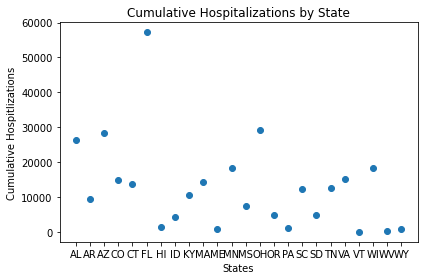

In [ ]:
plt.scatter(df1.index, df1['hospitalizedCumulative'])
plt.title('Cumulative Hospitalizations by State')
plt.xlabel('States')
plt.ylabel('Cumulative Hospitlizations')
plt.tight_layout()

In [ ]:
df2=df1.reset_index()

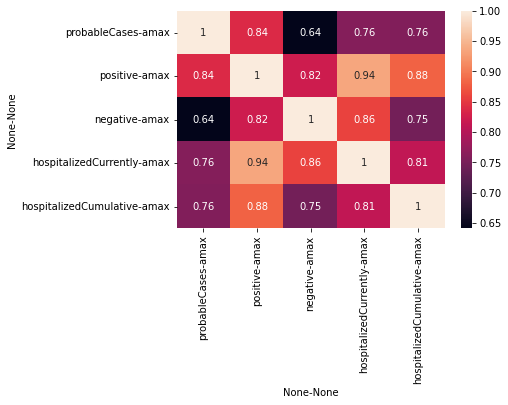

In [ ]:
corr = df2.corr() # allows us to get the correlations
sns.heatmap(corr, annot=True) # annot=True adds the values

In [ ]:
df2

,state,probableCases,positive,negative,hospitalizedCurrently,hospitalizedCumulative,state
,,amax,amax,amax,amax,amax,amax
0,AL,45962.0,269877.0,1421126.0,1927.0,26331.0,AL
1,AR,22753.0,170924.0,1614979.0,1088.0,9401.0,AR
2,AZ,12590.0,364276.0,2018813.0,3517.0,28248.0,AZ
3,CO,11069.0,260581.0,1608829.0,1995.0,14868.0,CO
4,CT,8131.0,127715.0,3294383.0,1972.0,13793.0,CT
5,FL,100964.0,1040727.0,6505237.0,9520.0,57185.0,FL
6,HI,315.0,18842.0,295153.0,297.0,1325.0,HI
7,ID,17345.0,109705.0,398027.0,477.0,4372.0,ID
8,KY,34939.0,200632.0,2568543.0,1810.0,10678.0,KY


In [ ]:
from sklearn.model_selection import train_test_split

X = df2[['probableCases']]
y = df2['positive']

# Split into train and test.
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize a linear regression model object
lr = LinearRegression() 

# Fit the linear regression model object to our data
lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [ ]:
# The coefficients
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Coefficients: 
 [[8.95308428]]
Intercept: 
 [35849.12241758]


In [ ]:
y_pred = lr.predict(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Text(0, 0.5, 'Actual Positive Cases')

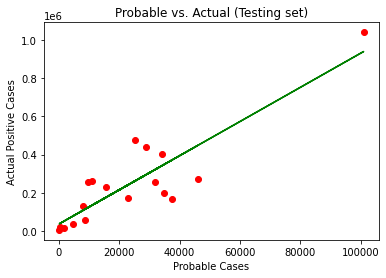

In [ ]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, y_pred, color='green')
plt.title("Probable vs. Actual (Testing set)")
plt.xlabel("Probable Cases")
plt.ylabel("Actual Positive Cases")

Text(0, 0.5, 'Actual Positive Cases')

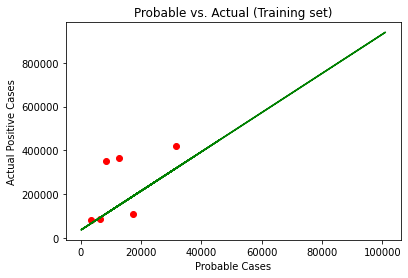

In [ ]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, y_pred, color='green')
plt.title("Probable vs. Actual (Training set)")
plt.xlabel("Probable Cases")
plt.ylabel("Actual Positive Cases")